# CSGO Result Prediction
## Importing Libraries

In [57]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Importing and Exploring Data 

In [3]:
data = pd.read_csv('./CSGO.csv')
data2 = data.rename(columns = {'Team A Rounds':'Team A','Team B Rounds':'Team B'},inplace=False)
data2.head()

,Map,Year,Wait_time,Match_time,Team A,Team B,Ping,Kills,Assists,Deaths,Mvp's,HS%,Points,Result
0,Mirage,2018,327,2906,16,13,215,17,2,21,2,5,45,Win
1,Mirage,2018,336,2592,16,11,199,13,4,24,2,0,40,Lost
2,Mirage,2018,414,2731,16,14,85,15,3,18,3,26,37,Win
3,Mirage,2018,317,2379,11,16,93,12,2,15,2,16,30,Lost
4,Mirage,2018,340,3467,15,15,94,33,5,20,5,30,83,Tie


In [4]:
data2.columns

Index(['Map', 'Year', 'Wait_time', ' Match_time', 'Team A', 'Team B', 'Ping',
       'Kills', 'Assists', 'Deaths', 'Mvp's', 'HS%', 'Points', 'Result'],
      dtype='object')

In [5]:
data2.dtypes

Map            object
Year            int64
Wait_time       int64
 Match_time     int64
Team A          int64
Team B          int64
Ping            int64
Kills           int64
Assists         int64
Deaths          int64
Mvp's           int64
HS%             int64
Points          int64
Result         object
dtype: object

In [6]:
data2.isnull()

,Map,Year,Wait_time,Match_time,Team A,Team B,Ping,Kills,Assists,Deaths,Mvp's,HS%,Points,Result
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1129,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1130,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1131,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data2.describe()

,Year,Wait_time,Match_time,Team A,Team B,Ping,Kills,Assists,Deaths,Mvp's,HS%,Points
count,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000,1133.000000
mean,2016.330980,118.533098,2291.438658,12.393645,12.269197,72.494263,14.706090,4.158870,17.034422,1.825243,24.902030,39.217123
std,1.112443,134.129684,474.524327,4.539815,4.509403,65.995966,5.948775,2.363482,4.792483,1.487699,13.672214,14.898022
min,2015.000000,0.000000,630.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,9.000000,1942.000000,9.000000,9.000000,31.000000,11.000000,2.000000,14.000000,1.000000,16.000000,29.000000
50%,2017.000000,48.000000,2311.000000,15.000000,15.000000,76.000000,14.000000,4.000000,18.000000,2.000000,23.000000,39.000000
75%,2017.000000,213.000000,2648.000000,16.000000,16.000000,92.000000,18.000000,6.000000,21.000000,3.000000,33.000000,49.000000
max,2018.000000,589.000000,3603.000000,16.000000,16.000000,724.000000,36.000000,14.000000,27.000000,8.000000,100.000000,89.000000


# Data Preprocessing

## As we can see there are no irregularities in data
### Now we have to find NaN and ?

In [8]:
data2.count()

Map            1133
Year           1133
Wait_time      1133
 Match_time    1133
Team A         1133
Team B         1133
Ping           1133
Kills          1133
Assists        1133
Deaths         1133
Mvp's          1133
HS%            1133
Points         1133
Result         1133
dtype: int64

## Here we can see our data is clean and ready for analysis.

In [9]:
data2.count().isna()

Map            False
Year           False
Wait_time      False
 Match_time    False
Team A         False
Team B         False
Ping           False
Kills          False
Assists        False
Deaths         False
Mvp's          False
HS%            False
Points         False
Result         False
dtype: bool

## Exploratory Data Analysis

In [10]:
data2.head()

,Map,Year,Wait_time,Match_time,Team A,Team B,Ping,Kills,Assists,Deaths,Mvp's,HS%,Points,Result
0,Mirage,2018,327,2906,16,13,215,17,2,21,2,5,45,Win
1,Mirage,2018,336,2592,16,11,199,13,4,24,2,0,40,Lost
2,Mirage,2018,414,2731,16,14,85,15,3,18,3,26,37,Win
3,Mirage,2018,317,2379,11,16,93,12,2,15,2,16,30,Lost
4,Mirage,2018,340,3467,15,15,94,33,5,20,5,30,83,Tie


In [11]:
data2['Map'].value_counts()

Dust II        547
Mirage         363
Inferno        132
Cache           59
Overpass        13
Cobblestone     12
Nuke             4
Canals           1
Italy            1
Austria          1
Name: Map, dtype: int64

In [12]:
x = data2[data2['Map'] == 'Mirage'].tail()
x

,Map,Year,Wait_time,Match_time,Team A,Team B,Ping,Kills,Assists,Deaths,Mvp's,HS%,Points,Result
1109,Mirage,2015,10,2131,8,16,0,1,2,8,0,0,4,Lost
1115,Mirage,2015,11,2032,4,16,40,12,7,17,2,58,32,Lost
1117,Mirage,2015,6,1877,16,5,25,10,3,15,2,10,32,Lost
1120,Mirage,2015,30,2435,16,12,34,14,9,21,1,28,41,Win
1121,Mirage,2015,1,2299,9,16,0,11,4,16,2,15,33,Lost


In [13]:
data2.isnull().sum()

Map            0
Year           0
Wait_time      0
 Match_time    0
Team A         0
Team B         0
Ping           0
Kills          0
Assists        0
Deaths         0
Mvp's          0
HS%            0
Points         0
Result         0
dtype: int64

In [14]:
Result = data2.groupby("Result")["Map"].count()
Result

Result
Lost    560
Tie      85
Win     488
Name: Map, dtype: int64

In [15]:
Map = data2.groupby("Map")["Result"].count()
Map

Map
Austria          1
Cache           59
Canals           1
Cobblestone     12
Dust II        547
Inferno        132
Italy            1
Mirage         363
Nuke             4
Overpass        13
Name: Result, dtype: int64

In [16]:
data.mean()

Year             2016.330980
Wait_time         118.533098
 Match_time      2291.438658
Team A Rounds      12.393645
Team B Rounds      12.269197
Ping               72.494263
Kills              14.706090
Assists             4.158870
Deaths             17.034422
Mvp's               1.825243
HS%                24.902030
Points             39.217123
dtype: float64

In [17]:
data.dtypes

Map              object
Year              int64
Wait_time         int64
 Match_time       int64
Team A Rounds     int64
Team B Rounds     int64
Ping              int64
Kills             int64
Assists           int64
Deaths            int64
Mvp's             int64
HS%               int64
Points            int64
Result           object
dtype: object

In [18]:
df = data2[['Map','Deaths','Result']]
df.head()

,Map,Deaths,Result
0,Mirage,21,Win
1,Mirage,24,Lost
2,Mirage,18,Win
3,Mirage,15,Lost
4,Mirage,20,Tie


In [19]:
df_grp = df.groupby(['Map','Result'],as_index=False).mean()
df_grp

,Map,Result,Deaths
0,Austria,Lost,22.000000
1,Cache,Lost,18.310345
2,Cache,Tie,20.333333
3,Cache,Win,14.629630
4,Canals,Win,18.000000
5,Cobblestone,Lost,18.000000
6,Cobblestone,Tie,21.000000
7,Cobblestone,Win,16.000000
8,Dust II,Lost,18.635338
9,Dust II,Tie,21.073171


## Finding Correlation between variables 

In [20]:
data2.corr().head()

,Year,Wait_time,Match_time,Team A,Team B,Ping,Kills,Assists,Deaths,Mvp's,HS%,Points
Year,1.000000,0.722384,0.103838,0.009163,0.051958,0.467642,0.049954,0.013246,-0.015560,0.065940,-0.124077,0.022791
Wait_time,0.722384,1.000000,0.105701,0.000087,0.061210,0.360560,0.041506,0.011896,0.004182,0.047637,-0.064931,0.027221
Match_time,0.103838,0.105701,1.000000,0.425267,0.419203,0.058498,0.439178,0.310732,0.619812,0.221049,0.002201,0.491566
Team A,0.009163,0.000087,0.425267,1.000000,-0.580434,0.005601,0.226000,0.143679,0.268004,0.099137,-0.073557,0.241780
Team B,0.051958,0.061210,0.419203,-0.580434,1.000000,0.046266,0.183020,0.158358,0.331202,0.090372,0.079864,0.212715


In [21]:
data2[['HS%','Points']].corr()

,HS%,Points
HS%,1.000000,-0.013509
Points,-0.013509,1.000000


In [22]:
data2[['Deaths','Points']].corr()

,Deaths,Points
Deaths,1.000000,0.301727
Points,0.301727,1.000000


In [23]:
data2[['Wait_time','Ping']].corr()

,Wait_time,Ping
Wait_time,1.00000,0.36056
Ping,0.36056,1.00000


## Data Visualization 

### We will use Matplotlib and Seaborn as Data Visualization Libraries

In [25]:
data2.head()

,Map,Year,Wait_time,Match_time,Team A,Team B,Ping,Kills,Assists,Deaths,Mvp's,HS%,Points,Result
0,Mirage,2018,327,2906,16,13,215,17,2,21,2,5,45,Win
1,Mirage,2018,336,2592,16,11,199,13,4,24,2,0,40,Lost
2,Mirage,2018,414,2731,16,14,85,15,3,18,3,26,37,Win
3,Mirage,2018,317,2379,11,16,93,12,2,15,2,16,30,Lost
4,Mirage,2018,340,3467,15,15,94,33,5,20,5,30,83,Tie


### We will plot results of both teams with their total winning rounds 

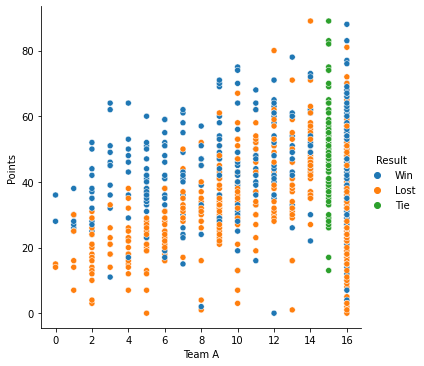

In [26]:
team1 = data2['Team A']
res = data2['Result']

cal  = data2["Points"]

sns.relplot(x = team1,y = cal, hue = res,kind ='scatter', data=data2)

### Graph of team B

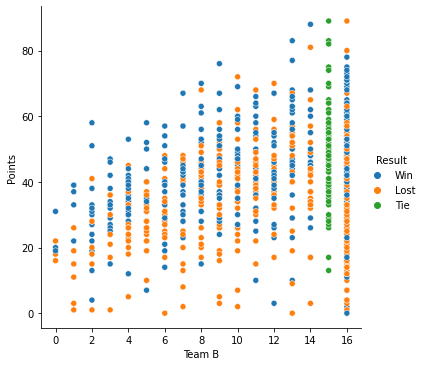

In [27]:
team1 = data2['Team B']
res = data2['Result']

cal  = data2["Points"]

sns.relplot(x = team1,y = cal, hue = res,kind ='scatter', data=data2)

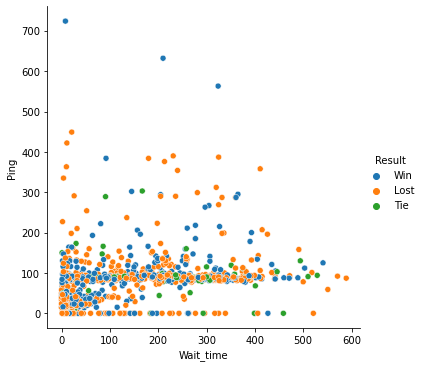

In [28]:
sns.relplot(x='Wait_time',y='Ping',hue='Result',data=data2)

### Q.)Grouping Team A with Points and Result to plot relationships.

,Points,Result,Team A
0,0,Lost,10.50
1,0,Win,12.00
2,1,Lost,13.25
3,2,Lost,16.00
4,2,Win,8.00
...,...,...,...
185,83,Tie,15.00
186,83,Win,16.00
187,88,Win,16.00
188,89,Lost,14.00


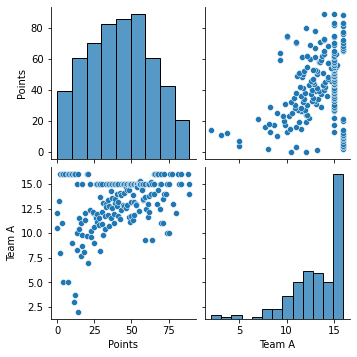

In [29]:
df1 = data2[['Team A','Points','Result']]
df_grp = df1.groupby(['Points','Result'],as_index=False).mean()
df_grp

plot = sns.pairplot(df_grp)
df_grp

<AxesSubplot:xlabel='Kills', ylabel='Assists'>

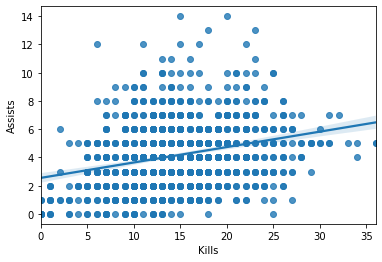

In [30]:
sns.regplot(x='Kills',y='Assists',data=data2)

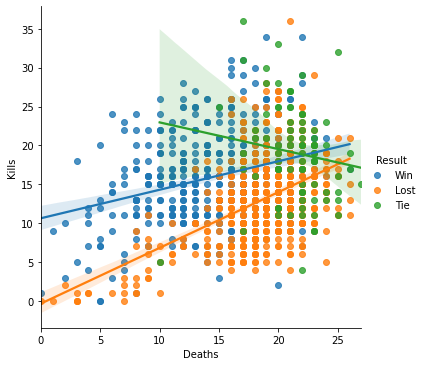

In [31]:
sns.lmplot(x="Deaths", y="Kills", hue="Result", data=data2);


<AxesSubplot:xlabel='Count', ylabel='Map'>

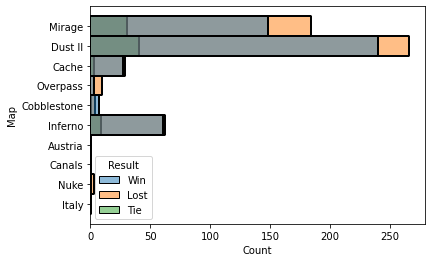

In [32]:
sns.histplot(y=data2['Map'],hue=data2['Result'])

<AxesSubplot:xlabel='Kills', ylabel='Deaths'>

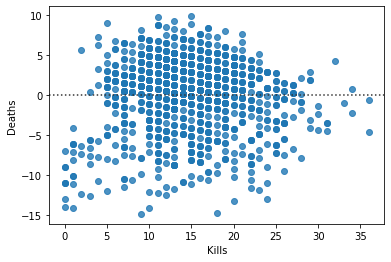

In [33]:
sns.residplot(x = data2['Kills'],y = data2['Deaths'])

### Calculating Pearson Coefficient 

In [34]:
w_time = data2['Wait_time']
ping = data2['Ping']

p_coeff,p_value = pearsonr(w_time,ping)
print ('Pearson Coefficient:', p_coeff)
print('P_Value :',p_value)

Pearson Coefficient: 0.3605601603254368
P_Value : 4.09939204617009e-36


In [35]:
kills = data2['Kills']
assists = data2['Assists']
deaths = data2['Deaths']

p_coeff,p_value = pearsonr(kills,deaths)
print('Pearson Coefficient:',p_coeff)
print('p_value',p_value)

p_coeff2,p_value2 = pearsonr(assists,deaths)
print('Pearson Coefficient:',p_coeff2)
print('p_value:',p_value2)



Pearson Coefficient: 0.26432486443329944
p_value 1.445684055760093e-19
Pearson Coefficient: 0.30999627001081353
p_value: 1.1666200870375445e-26


# Feature Selection

In [36]:
data2.head()

,Map,Year,Wait_time,Match_time,Team A,Team B,Ping,Kills,Assists,Deaths,Mvp's,HS%,Points,Result
0,Mirage,2018,327,2906,16,13,215,17,2,21,2,5,45,Win
1,Mirage,2018,336,2592,16,11,199,13,4,24,2,0,40,Lost
2,Mirage,2018,414,2731,16,14,85,15,3,18,3,26,37,Win
3,Mirage,2018,317,2379,11,16,93,12,2,15,2,16,30,Lost
4,Mirage,2018,340,3467,15,15,94,33,5,20,5,30,83,Tie


In [50]:
features = data2[['Team A','Team B','Kills','Deaths','Points']]
target_value = data2[['Result']]
features.head()

,Team A,Team B,Kills,Deaths,Points
0,16,13,17,21,45
1,16,11,13,24,40
2,16,14,15,18,37
3,11,16,12,15,30
4,15,15,33,20,83


## Splitting data into Train and Test data 
## Building Model

In [51]:
X_train,X_test,y_train,y_test = train_test_split(features,target_value,test_size=0.2,random_state = 0)
model = SVC(gamma = 'auto')
model.fit(X_train,y_train)
predictions = model.predict(X_test)

print('Accuracy of model:',accuracy_score(y_test, predictions))
print('Confusion Matrix\n',confusion_matrix(y_test, predictions))
print('Classification Report\n',classification_report(y_test, predictions))

Accuracy of model: 0.7400881057268722
Confusion Matrix
 [[86  0 19]
 [ 5  7  2]
 [33  0 75]]
Classification Report
               precision    recall  f1-score   support

        Lost       0.69      0.82      0.75       105
         Tie       1.00      0.50      0.67        14
         Win       0.78      0.69      0.74       108

    accuracy                           0.74       227
   macro avg       0.82      0.67      0.72       227
weighted avg       0.75      0.74      0.74       227



F:\AnacondaPython\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## Prediction and Plotting  

<AxesSubplot:ylabel='Count'>

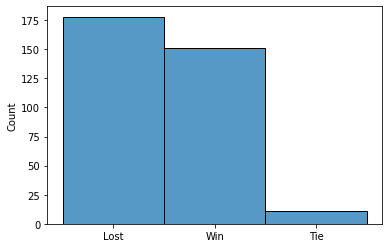

In [39]:
sns.histplot(predictions)

In [54]:
test = [[14,16,22,20,57]]
predict = model.predict(test)
predict

array(['Lost'], dtype=object)